In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

Dataset URL: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
License(s): CC0-1.0


In [3]:
!unzip /content/az-handwritten-alphabets-in-csv-format.zip

Archive:  /content/az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


# Loading Data Set

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('A_Z Handwritten Data/A_Z Handwritten Data.csv')

In [6]:
df.shape

(372450, 785)

# Data Analysis

In [7]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [6]:
df.rename(columns={'0':'output'}, inplace=True)

In [7]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [25]:
df['output'].value_counts()

,count
output,
14,57825
18,48419
20,29008
2,23409
19,22495
15,19341
13,19010
0,13869
12,12336


In [8]:
X = df.drop(columns=['output'])
y = df['output']

In [9]:
y = y.astype(int)

# Data Visualization

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
alphabet_counts = y.value_counts().sort_index()

In [37]:
alphabet_counts.index = alphabet_counts.index.map(word_dict)

<ipython-input-38-46c1165ccaa1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alphabet_counts.index, y=alphabet_counts.values, palette='viridis')


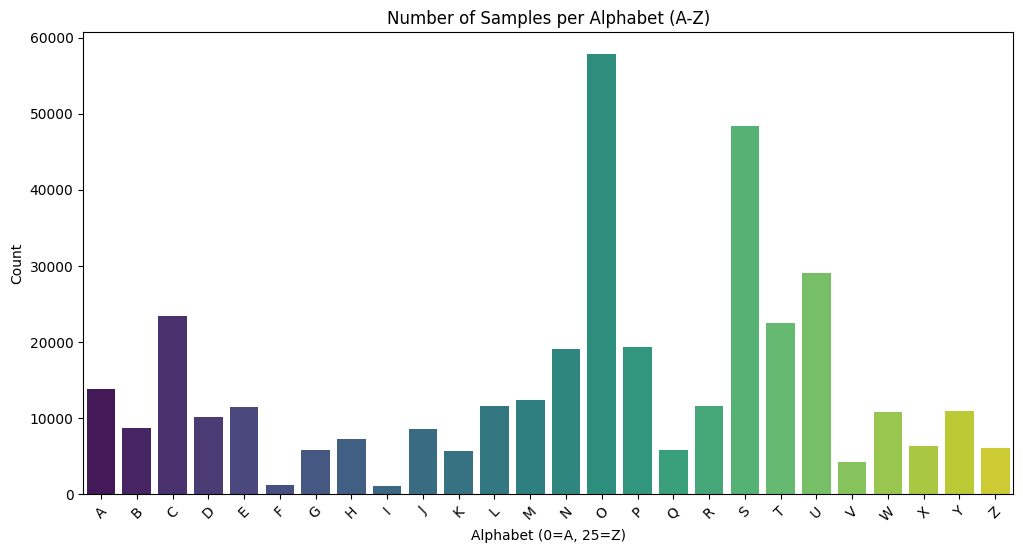

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=alphabet_counts.index, y=alphabet_counts.values, palette='viridis')
plt.title("Number of Samples per Alphabet (A-Z)")
plt.xlabel("Alphabet (0=A, 25=Z)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

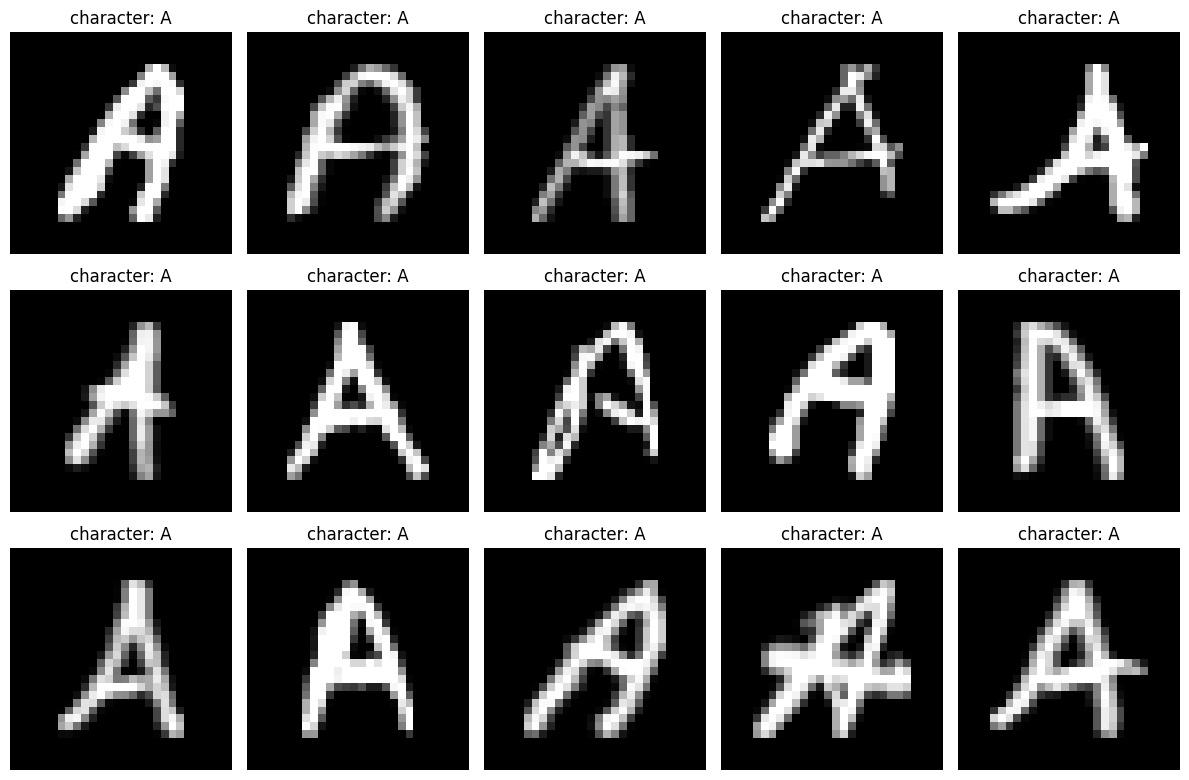

In [40]:
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    img = X.iloc[i].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"character: {chr(65 + int(y[i]))}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Machine Learning Model Training

In [15]:
from sklearn.model_selection import train_test_split

## Preprocessing Data

In [10]:
X = X / 255.0

## Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (297960, 784)
Test data shape: (74490, 784)


## Model Building

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluating Model

In [20]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")

Random Forest Results:
Accuracy: 0.9876


# Classification Report

In [21]:
print(classification_report(y_test, rf_pred, target_names=list(word_dict.values())))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98      2806
           B       0.98      0.98      0.98      1673
           C       0.99      0.99      0.99      4742
           D       0.98      0.96      0.97      2044
           E       0.99      0.98      0.99      2214
           F       1.00      0.94      0.97       231
           G       0.99      0.97      0.98      1183
           H       0.98      0.96      0.97      1466
           I       1.00      0.96      0.98       237
           J       0.98      0.97      0.98      1668
           K       0.98      0.96      0.97      1132
           L       1.00      1.00      1.00      2319
           M       0.98      0.97      0.98      2487
           N       0.98      0.99      0.98      3756
           O       0.99      1.00      0.99     11629
           P       0.99      0.99      0.99      3868
           Q       0.99      0.95      0.97      1159
           R       0.98    

# Visualizing Prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

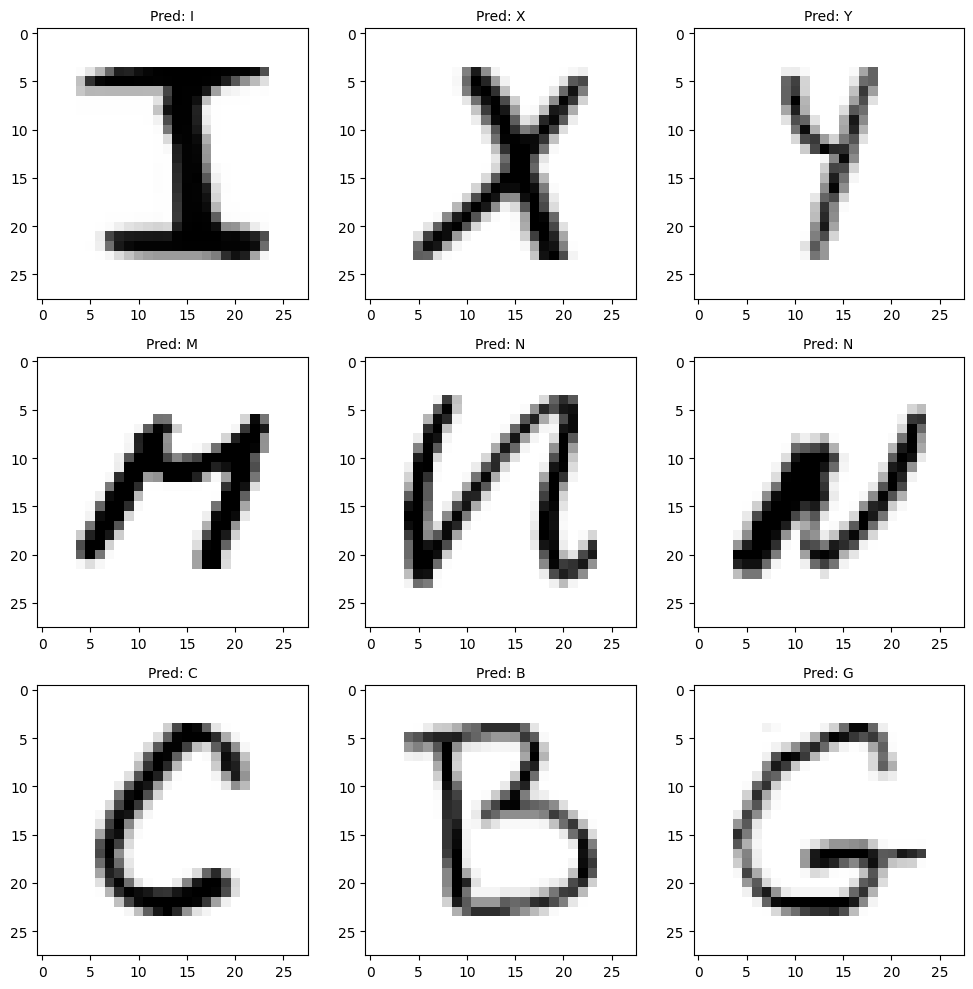

In [27]:
sample_indices = np.random.choice(len(X_test), 9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test.iloc[sample_indices[i]].values.reshape(28, 28)
    true_label = word_dict[y_test.iloc[sample_indices[i]]]

    rf_pred = word_dict[rf_model.predict([X_test.iloc[sample_indices[i]]])[0]]

    ax.imshow(img, cmap='Greys')
    ax.set_title(f"Pred: {rf_pred}", fontsize=10)

plt.tight_layout()
plt.show()

# Exporting Our ML model

In [46]:
from joblib import dump

dump(rf_model, 'random_forest_az_handwritten.joblib', compress=3)

['random_forest_az_handwritten.joblib']

In [47]:
from google.colab import files
files.download('random_forest_az_handwritten.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now Using CNN

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

In [12]:
X = X.values.reshape(-1, 28, 28, 1)

In [13]:
y = to_categorical(y, num_classes=26)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(26, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test))

Epoch 1/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.8552 - loss: 0.5144 - val_accuracy: 0.9803 - val_loss: 0.0705
Epoch 2/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9670 - loss: 0.1186 - val_accuracy: 0.9861 - val_loss: 0.0502
Epoch 3/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9748 - loss: 0.0901 - val_accuracy: 0.9883 - val_loss: 0.0450
Epoch 4/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9796 - loss: 0.0720 - val_accuracy: 0.9894 - val_loss: 0.0409
Epoch 5/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9825 - loss: 0.0617 - val_accuracy: 0.9903 - val_loss: 0.0371
Epoch 6/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9843 - loss: 0.0547 - val_accuracy: 0.9908 - val_loss: 0.0357
Epoch 7/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9857 - loss: 0.0485 - val_accuracy: 0.9918 - val_loss: 0.0314
Epoch 8/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9868 - loss: 0

# Visualizing CNN Performance

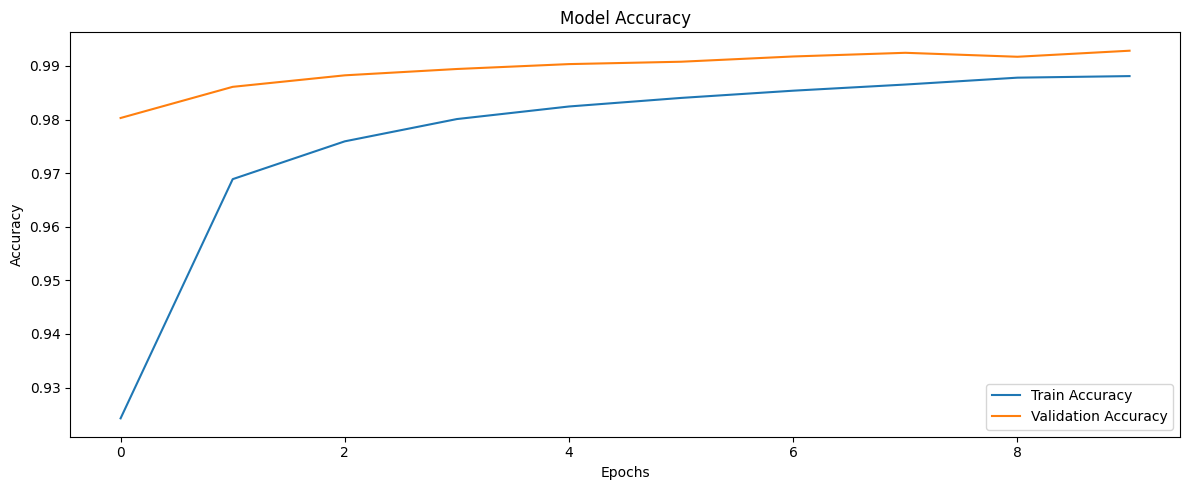

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

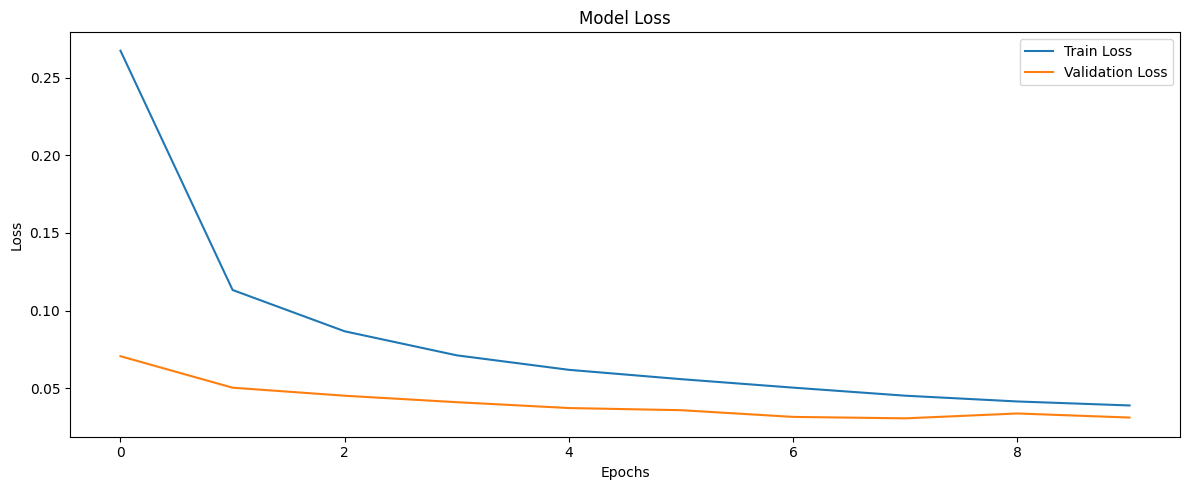

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Exporting CNN Model

In [24]:
from joblib import dump
dump(model, 'cnn_az_handwritten.joblib', compress=3)

['cnn_az_handwritten.joblib']

In [25]:
from google.colab import files
files.download('cnn_az_handwritten.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>